In [20]:
import torch
#torch.nn.Module.dump_patches = True
from matplotlib import pyplot as plt
import numpy as np

In [21]:
from models.wgan import GoodGenerator

In [22]:
gen = GoodGenerator()

In [23]:
gen = torch.load('../../results/darpa_2/darpa_output_6classes/generator.pt', map_location= 'cpu')

In [24]:
z = torch.randn(25, 128)

In [25]:
sd = gen.state_dict()

In [26]:
gen.load_state_dict(sd)

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [27]:
imgs = gen(z)

In [28]:
imgs = imgs.view(25, 6, 128,128)

In [29]:
maps = torch.argmax(imgs, dim=1)

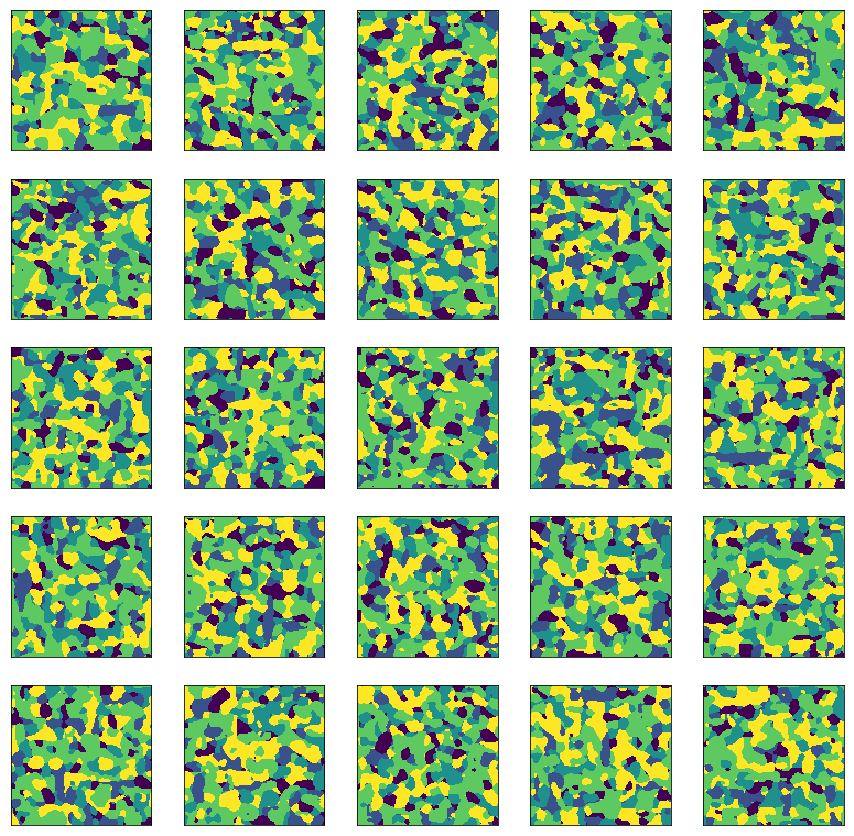

In [30]:
fig = plt.figure(figsize=(15,15))
j=k=1
for i in range(25):
    ax = fig.add_subplot(5,5,j)
    ax.imshow(maps[i,...])
    ax.tick_params(axis='both', which='both', left=False, right=False, top=False, bottom=False, labelbottom=False, labelleft=False)
    j+=1
plt.savefig('voronoi2.png', bbox_inches='tight', transparent=True, pad_inches=0)

In [31]:
orig_imgs = np.load('material_arrays_cropped.npy')

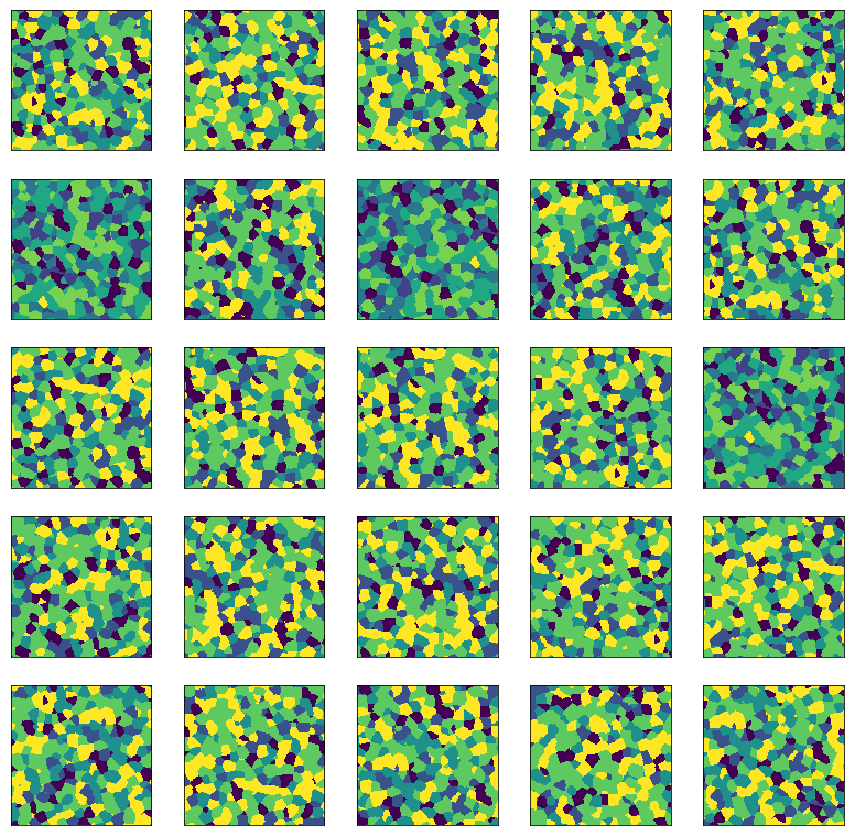

In [32]:
fig = plt.figure(figsize=(15,15))
j=k=1
for i in range(25):
    ax = fig.add_subplot(5,5,j)
    ax.imshow(orig_imgs[i,...])
    ax.tick_params(axis='both', which='both', left=False, right=False, top=False, bottom=False, labelbottom=False, labelleft=False)
    j+=1
plt.savefig('voronoi_orig.png', bbox_inches='tight', transparent=True, pad_inches=0)

In [76]:
import h5py

In [77]:
d = h5py.File('datasets/polycrystals_synth/orient_voronoi_noZero_valid.h5','r')

In [87]:
imgs = d['dataset'][40:50,...]

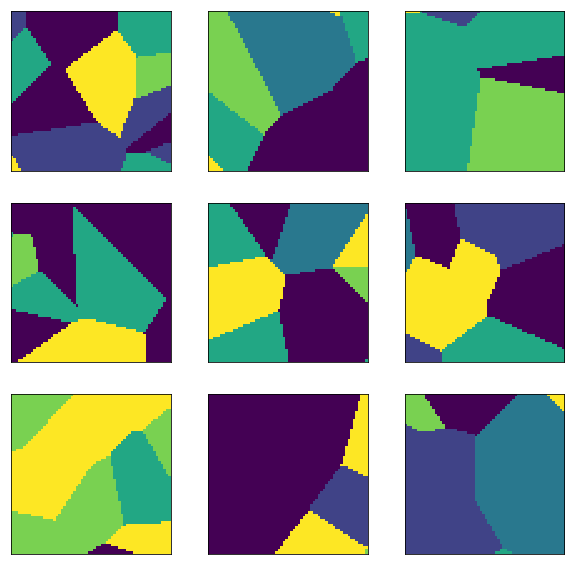

In [89]:
fig = plt.figure(figsize=(10,10))
j=k=1
for i in range(9):
    ax = fig.add_subplot(3,3,j)
    ax.imshow(imgs[i,...])
    ax.tick_params(axis='both', which='both', left=False, right=False, top=False, bottom=False, labelbottom=False, labelleft=False)
    j+=1
plt.savefig('voronoi_orig.png', bbox_inches='tight', transparent=True, pad_inches=0)

In [52]:
from models.checkers import p2_fn
import numpy as np
device = torch.device('cuda')

In [49]:
g = p2_fn(torch.tensor(imgs[3,0,...]).unsqueeze(0).unsqueeze(0).to(device))

/data/work2/Phys-GAN/physgan/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


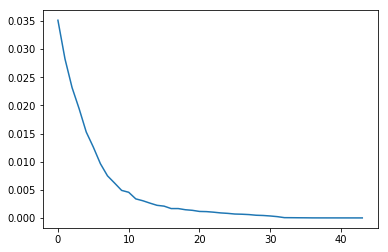

In [50]:
plt.plot(g[0,:].cpu().detach().numpy())

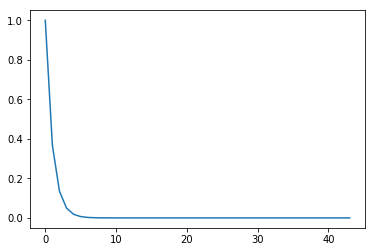

In [55]:
plt.plot(np.exp(-np.arange(0,44,1)))